# Objetives


*   Clean the data
*   From the "popular_tags" create up to 3 new columns separating the tags one by one
*   check top 10 games per year by reviews
*   Check how games perform after launch (using recent reviews compare them with the all time to see if the game has aged)
*   Graph those findings
*   Best games per labels (such as horror, adventure, shooting, multiplayer)
*   By year which are the most used labels (to check tendencies of the industry)



# Importing the data and libraries:


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re
import math

In [ ]:
df= pd.read_csv("/content/drive/MyDrive/Analysis data/steam_games.csv")
clean_df= df

In [ ]:
# Display of the data
clean_df.head()

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN


In [ ]:
# @title Defining the data and getting more information of it
clean_df.info()
clean_df.describe(include= 'all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40833 entries, 0 to 40832
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   url                       40833 non-null  object 
 1   types                     40831 non-null  object 
 2   name                      40817 non-null  object 
 3   desc_snippet              27612 non-null  object 
 4   recent_reviews            2706 non-null   object 
 5   all_reviews               28470 non-null  object 
 6   release_date              37654 non-null  object 
 7   developer                 40490 non-null  object 
 8   publisher                 35733 non-null  object 
 9   popular_tags              37888 non-null  object 
 10  game_details              40313 non-null  object 
 11  languages                 40797 non-null  object 
 12  achievements              12194 non-null  float64
 13  genre                     40395 non-null  object 
 14  game_d

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
count,40833,40831,40817,27612,2706,28470,37654,40490,35733,37888,40313,40797,12194.000000,40395,37920,2897,21069,21075,35522,14543
unique,40833,3,40749,27410,1299,9209,4107,17420,15290,20852,6016,5496,NaN,1768,37496,1267,14762,13836,681,2060
top,https://store.steampowered.com/app/379720/DOOM/,app,Game + Soundtrack,Minimal physical puzzle with explosions,"Very Positive,(11),- 90% of the 11 user review...","1 user reviews,- Need more user reviews to gen...",2019,Ubisoft - San Francisco,"Degica,Degica",Action,Single-player,English,NaN,Action,About This Content A ticket that can be used ...,Mature Content Description The developers de...,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, Win...",$4.99,$0.49
freq,1,38021,4,12,36,3023,296,1041,469,1215,3547,19085,NaN,2386,54,417,742,925,4123,198
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.237494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,448.501848,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# @title Data cleaning
# elimination of NaN and from the types column all those how are not labbeled as tags, as they are mostly games bunddles or the same game rereleased
clean_df = df[df['types'] != 'bundle']
clean_df = clean_df[df['types'] != 'sub']
clean_df.describe(include= 'all')

<ipython-input-31-632815f55759>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_df = clean_df[df['types'] != 'sub']


,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
count,38023,38021,38007,24802,2706,28470,37654,37721,33021,37888,37546,38007,12194.000000,37625,37920,2897,21069,21075,35000,11747
unique,38023,1,37961,24615,1299,9209,4107,17284,14006,20852,5498,4451,NaN,1185,37496,1267,14762,13836,629,1880
top,https://store.steampowered.com/app/379720/DOOM/,app,Exodus,Minimal physical puzzle with explosions,"Very Positive,(11),- 90% of the 11 user review...","1 user reviews,- Need more user reviews to gen...",2019,Ubisoft - San Francisco,"Degica,Degica",Action,Single-player,English,NaN,Action,About This Content A ticket that can be used ...,Mature Content Description The developers de...,"Minimum:,OS:,Windows Vista, Windows 7, Windows...","Recommended:,OS:,Windows Vista, Windows 7, Win...",$4.99,$0.49
freq,1,38021,3,12,36,3023,296,1041,469,1215,3425,18240,NaN,2236,54,417,742,925,4113,197
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.237494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,448.501848,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# @title Split and Process Tags Column
clean_df= df
tags_split= clean_df['popular_tags'].str.split(',', n=3, expand=True)
tags_split = tags_split.drop(columns=tags_split.columns[3:])

# Rename the columns to 'tag_1', 'tag_2', and 'tag_3'
tags_split.columns = ['tag_1', 'tag_2', 'tag_3']

# Combine the new columns with the original DataFrame
clean_df = pd.concat([clean_df, tags_split], axis=1)

# Drop the 'tags' column
clean_df= clean_df.drop(columns= ['popular_tags'])

# Display the result
clean_df.head()

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,game_details,...,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price,tag_1,tag_2,tag_3
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","Single-player,Multi-player,Co-op,Steam Achieve...",...,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99,FPS,Gore,Action
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Multi-player,Online Multi-Player,Stats",...,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN,Survival,Shooter,Multiplayer
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Single-player,Multi-player,Online Multi-Player...",...,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN,Mechs,Strategy,Turn-Based
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Multi-player,Online Multi-Player,Steam Worksho...",...,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN,Survival,Zombies,Open World
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Multi-player,Online Multi-Player,MMO,Co-op,Onl...",...,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN,Space,Massively Multiplayer,Sci-fi


In [ ]:
# @title creation of total votes and % of positivies reviews from all_reviews
#here from the all reviews column can be gathered total votes (which it's a indicator of the game popularity) and the % of upvotes which is an score given by the comunity
temp_df = clean_df


temp_df['total_votes'] = temp_df['all_reviews'].str.extract('\((\d+(?:,\d{3})*?)\)')
temp_df['total_votes'] = temp_df['total_votes'].str.replace(',', '').fillna(0).astype(int)
temp_df['posit_reviews']= temp_df['all_reviews'].str.extract('(\d{1,3})%').fillna(0).astype(int)

#here price values will be made into a float, and calculated an average price as not all people buys the games at full price
temp_df['full_price']= temp_df['original_price'].str.extract('\$(\d.+)').fillna(0).astype(float)
temp_df['discounted_price']= temp_df['discount_price'].str.extract('\$(\d.+)').fillna(0).astype(float)

temp_df['average_price']= round((temp_df['full_price']+temp_df['discounted_price'])/2, 2)
temp_df['aprox_money']= temp_df['total_votes']*temp_df['average_price']
# # Drop if the all_reviews column and change the clean_df
temp_df= temp_df.drop(columns=['all_reviews','original_price','discount_price'])
temp_df.head()
clean_df=temp_df


,url,types,name,desc_snippet,recent_reviews,release_date,developer,publisher,game_details,languages,...,recommended_requirements,tag_1,tag_2,tag_3,total_votes,posit_reviews,full_price,discounted_price,average_price,aprox_money
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",...,"Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",FPS,Gore,Action,42550,92,19.99,14.99,17.49,744199.5
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",...,"Recommended:,Requires a 64-bit processor and o...",Survival,Shooter,Multiplayer,836608,49,29.99,0.00,15.00,12549120.0
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",...,"Recommended:,Requires a 64-bit processor and o...",Mechs,Strategy,Turn-Based,7030,71,39.99,0.00,20.00,140600.0
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",...,"Recommended:,OS:,Windows 10 64-bit,Processor:,...",Survival,Zombies,Open World,167115,61,44.99,0.00,22.50,3760087.5
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","May 6, 2003",CCP,"CCP,CCP","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",...,"Recommended:,OS:,Windows 10,Processor:,Intel i...",Space,Massively Multiplayer,Sci-fi,11481,74,0.00,0.00,0.00,0.0


In [ ]:
# @title creation of recent votes and % of recent positivies reviews from recent reviews

temp_df = clean_df


temp_df['reviews_30d'] = temp_df['recent_reviews'].str.extract('\((\d+(?:,\d{3})*?)\)')
temp_df['reviews_30d'] = temp_df['reviews_30d'].str.replace(',', '').fillna(0).astype(int)
temp_df['posit_30d']= temp_df['recent_reviews'].str.extract('(\d{1,3})%')

# # Convert the columns to numeric (optional, if needed)

temp_df['posit_30d'] = pd.to_numeric(temp_df['posit_30d'])

# # Drop if the all_reviews column and change the clean_df
temp_df= temp_df.drop(columns='recent_reviews')



In [ ]:
# @title Obtaining the year of release of each game, and making the original and discounted prize into a number
temp_df = clean_df


temp_df['release_year'] = temp_df['release_date'].str.extract('(\d{4})')
temp_df['release_year'] = temp_df['release_year'].str.replace(',', '').fillna(0).astype(int)
#change of the prize to float, there were a lot of diferent ways saying it was a demo or free so they will placed as 0
temp_df['full_price']= temp_df['original_price'].str.extract('(\d.+\d{2})')
temp_df['full_price']= temp_df['full_price'].fillna(0).astype(float)
#give the new values to the clean_df
clean_df=temp_df

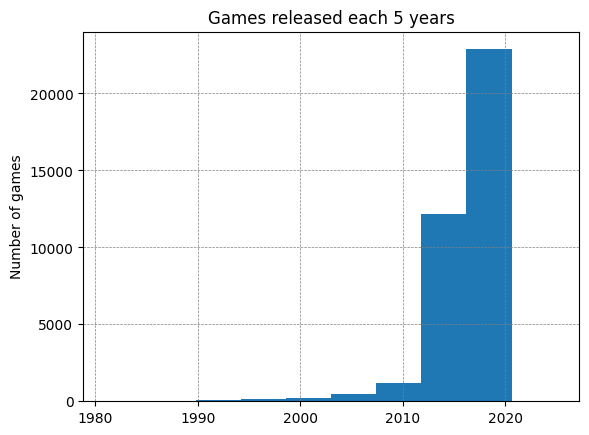

In [ ]:
# @title Most popular games each year
# Althought it's not an effective way as a game might increase it's popularity years after release, comparing the amount of reviews of each game is a way to show how much it sold
# a new df will hold the information about games, number of reviews and positivity
popular_games_df= clean_df[['name','release_year','total_votes','posit_reviews','aprox_money']].copy()
popular_games_df.dropna(inplace= True)
popular_games_df= popular_games_df.sort_values('release_year', ascending= True)
popular_games_df['release_year'].value_counts()[0]
popular_games_df.drop(popular_games_df[popular_games_df['release_year'] == 0].index, inplace= True)

#graph of games done each 5 years
plt.hist(popular_games_df['release_year'])
plt.title('Games released each 5 years')
plt.ylabel('Number of games')
plt.grid(True, linestyle= "--", linewidth= 0.5, color="gray")

We can see how the industry have been expanding an each new year more and more games are bein released. This is also because it's way easier that with modern tools a programmer by their own could create a videogame from zero.

In [ ]:
#Here we are looking to check which are the most popular games for each 5 years
#creating groups for each 5 years
temp_df= popular_games_df
groups= range(popular_games_df['release_year'].min(), popular_games_df['release_year'].max()+2, 5)
temp_df['grouped_year']= pd.cut(temp_df['release_year'], bins=groups, labels=[f'{i}-{i+4}' for i in groups[:-1]])
grouped_dfs= {group: group_df for group, group_df in temp_df.groupby('grouped_year')}

for group, group_df in grouped_dfs.items():
  print(f'----Most popular games for {group}----')
  printing_df= group_df.sort_values('total_votes', ascending= False).drop(columns='grouped_year').head(3)
  print(f'{printing_df} \n')


----Most popular games for 1981-1985----
                name  release_year  total_votes  posit_reviews  aprox_money
2096   Dragon's Lair          1983          375             77       1875.0
8224       Space Ace          1984           79             92        395.0
25654      Alter Ego          1986           26             69        104.0 

----Most popular games for 1986-1990----
                                    name  release_year  total_votes  \
912                       Commander Keen          1990          773   
4535                               LOOM™          1990          315   
3483  Wasteland 1 - The Original Classic          1988          177   

      posit_reviews  aprox_money  
912              92      2272.62  
4535             88       945.00  
3483             80       531.00   

----Most popular games for 1991-1995----
               name  release_year  total_votes  posit_reviews  aprox_money
96    Ultimate Doom          1995         3511             93     394

In [ ]:
# Although most of history the games most played tend to be also highly valuated in the last years in the industry the Free to play model more accesible.
#However, number of players not always mean a better game.
#For instance, Playerunknown's Battlegrounds (PUBG) is notorious for the presence of hackers, significantly impacting the overall gaming experience.
#An arbitrary number of 300 reviews were put as a minimum because with really small games tend to be biased.
for group, group_df in grouped_dfs.items():
  print(f'----Most popular games for {group}----')
  printing_df= group_df[group_df['total_votes'] > 299].sort_values('posit_reviews', ascending= False).drop(columns='grouped_year').head(10)
  print(f'{printing_df} \n')

----Most popular games for 1981-1985----
               name  release_year  total_votes  posit_reviews  aprox_money
2096  Dragon's Lair          1983          375             77       1875.0 

----Most popular games for 1986-1990----
                name  release_year  total_votes  posit_reviews  aprox_money
912   Commander Keen          1990          773             92      2272.62
4535           LOOM™          1990          315             88       945.00 

----Most popular games for 1991-1995----
                                                   name  release_year  \
1643  Pajama Sam: No Need to Hide When It's Dark Out...          1996   
2978                                 X-COM: UFO Defense          1993   
7976                                  Master of Orion 2          1996   
1790           Indiana Jones® and the Fate of Atlantis™          1992   
1996                                              QUAKE          1996   
1763                                     Wolfenstein 3D  

In [ ]:
just_once= popular_games_df[popular_games_df['total_votes']> 5500].sort_values('posit_reviews', ascending= False)
print("--- 50 most liked games of all time in the Steam Platform")
just_once.head(50)

--- 50 most liked games of all time in the Steam Platform


,name,release_year,total_votes,posit_reviews,aprox_money,grouped_year
3051,One Finger Death Punch,2014,11134,98,27835.00,2011-2015
6437,Kung Fury,2015,17215,98,0.00,2011-2015
255,Portal 2,2011,104354,98,1302337.92,2006-2010
3540,Iron Snout,2016,14306,98,0.00,2011-2015
6452,"Papers, Please - The Short Film",2018,9848,98,0.00,2016-2020
2407,Finding Paradise,2017,6307,98,132194.72,2016-2020
332,Factorio,2016,38652,98,579780.00,2011-2015
6391,Eternal Senia,2015,10423,97,0.00,2011-2015
834,VA-11 Hall-A: Cyberpunk Bartender Action,2016,10838,97,81285.00,2011-2015
842,Danganronpa: Trigger Happy Havoc,2016,5546,97,221729.08,2011-2015


In [ ]:
# @title Aged like fine wine
#here as with popular games we are looking which games maintain their a good flow of player playing (by looking at the number of recent reviews),
#and comparison on how they evolved with time, are the reviews as positive as the general one, did the positivity decreased or increased
#Increase in the positivity could mean good updates, new contect and work in the game, negative ones, could mean old mechanics, bad updates, or harmful players
game_comparison_df= clean_df[['name','release_year','posit_reviews','reviews_30d', 'posit_30d']].copy()
game_comparison_df.dropna(inplace= True)
game_comparison_df= game_comparison_df[game_comparison_df['reviews_30d']> 300]
game_comparison_df ['mod_posit']= game_comparison_df['posit_30d']-game_comparison_df['posit_reviews']
print("Table shows the game that had the biggest increase in positivity or score, comparing with they general positivity")
game_comparison_df.sort_values('mod_posit', ascending= False).head(10)


Table shows the game that had the biggest increase in positivity or score, comparing with they general positivity


,name,release_year,posit_reviews,reviews_30d,posit_30d,mod_posit
59,Grand Theft Auto IV: Complete Edition,2010,0,303,66.0,66.0
312,No Man's Sky,2016,51,545,73.0,22.0
378,MONSTER HUNTER: WORLD,2018,68,924,86.0,18.0
1596,ATLAS,2018,34,368,47.0,13.0
394,BATTALION 1944,2019,57,2423,68.0,11.0
293,Surviving Mars,2018,71,378,82.0,11.0
65,Realm Royale,2018,64,562,75.0,11.0
463,Metro 2033 Redux,2014,79,474,88.0,9.0
407,Grand Theft Auto V,2015,70,4352,78.0,8.0
3155,The Descendant,2016,87,368,94.0,7.0


In [ ]:
print("Table shows the game that had the games with the best positive recent reviews")
game_comparison_df.sort_values('posit_30d', ascending= False).head(10)

Table shows the game that had the games qith the best positive recent reviews


,name,release_year,posit_reviews,reviews_30d,posit_30d,mod_posit
26,Portal,2007,97,352,98.0,1.0
255,Portal 2,2011,98,899,98.0,0.0
273,Katana ZERO,2019,97,1396,97.0,0.0
235,The Binding of Isaac: Rebirth,2014,97,377,97.0,0.0
306,A Hat in Time,2017,97,655,97.0,0.0
332,Factorio,2016,98,505,97.0,-1.0
222,Mount & Blade: Warband,2010,97,475,96.0,-1.0
371,RimWorld,2018,97,519,96.0,-1.0
287,Wallpaper Engine,2018,96,1455,96.0,0.0
410,The Witcher® 3: Wild Hunt,2015,97,2386,96.0,-1.0


In [ ]:
print("Table shows the ranking of games with most quantity of recent reviews, showing influx of new players ")
game_comparison_df.sort_values('reviews_30d', ascending= False).head(10)

Table shows the ranking of games with most quantity of recent reviews, showing influx of new players 


,name,release_year,posit_reviews,reviews_30d,posit_30d,mod_posit
422,Counter-Strike: Global Offensive,2012,86,36076,86.0,0.0
419,Dota 2,2013,85,7804,73.0,-12.0
1,PLAYERUNKNOWN'S BATTLEGROUNDS,2017,49,6214,49.0,0.0
409,MORDHAU,2019,73,5299,65.0,-8.0
416,Tom Clancy's Rainbow Six® Siege,2015,81,4583,82.0,1.0
407,Grand Theft Auto V,2015,70,4352,78.0,8.0
386,Team Fortress 2,2007,93,3526,91.0,-2.0
271,Left 4 Dead 2,2009,96,3266,96.0,0.0
305,KurtzPel,2019,56,3239,56.0,0.0
335,Garry's Mod,2006,95,3125,94.0,-1.0


#

In [ ]:

game_comparison_df= clean_df[['name','release_year','posit_reviews','reviews_30d', 'posit_30d','aprox_money']].copy()
game_comparison_df.dropna(inplace= True)
game_comparison_df= game_comparison_df[game_comparison_df['reviews_30d']> 300]

print("Table show the games that generated the most money of all time")
game_comparison_df.sort_values('aprox_money', ascending= False).head(20)

Table show the games that generated the most money of all time


,name,release_year,posit_reviews,reviews_30d,posit_30d,aprox_money
422,Counter-Strike: Global Offensive,2012,86,36076,86.0,1.016452e+08
419,Dota 2,2013,85,7804,73.0,3.336315e+07
801,Life is Strange - Episode 1,2015,96,552,91.0,2.551086e+07
386,Team Fortress 2,2007,93,3526,91.0,1.818110e+07
1178,Tomb Raider,2013,95,413,93.0,1.655189e+07
407,Grand Theft Auto V,2015,70,4352,78.0,1.328306e+07
1,PLAYERUNKNOWN'S BATTLEGROUNDS,2017,49,6214,49.0,1.254912e+07
373,ARK: Survival Evolved,2017,69,932,73.0,1.184733e+07
416,Tom Clancy's Rainbow Six® Siege,2015,81,4583,82.0,9.194032e+06
82,Just Cause™ 3,2015,73,359,76.0,8.187171e+06


Text(0.5, 1.0, 'Release of games by month')

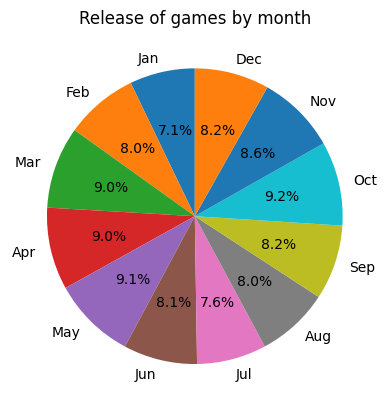

In [ ]:
temp_df = clean_df[['release_date', 'aprox_money']].copy()

temp_df['release_month'] = temp_df['release_date'].str.extract('(\D{3})')
# temp_df.dropna(inplace= True)
#temp_df= temp_df.drop(columns:'release_date')
months_abbrev = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a dictionary with months as keys and values initialized to 0
months = {month: {'frequency': 0, 'gains': 0} for month in months_abbrev}

for _, row in temp_df.iterrows():
    month = row['release_month']
    money_made = row['aprox_money']

    # Update the months dictionary
    if month in months:
      months[month]['frequency'] += 1
      months[month]['gains'] += money_made

#graph of % of games released each month
values= list(months[key]['frequency']  for key in months)
keys= list(months.keys())

plt.pie(values, labels= keys, autopct='%1.1f%%', startangle=90)
plt.title('Release of games by month')

This graph really surprises me as it seems that there is no correlation of month and game releases. Normally garmes are expected to be released for the christmast season. Maybe checking if Triple A games are released that way and the indie market stabilize it all.


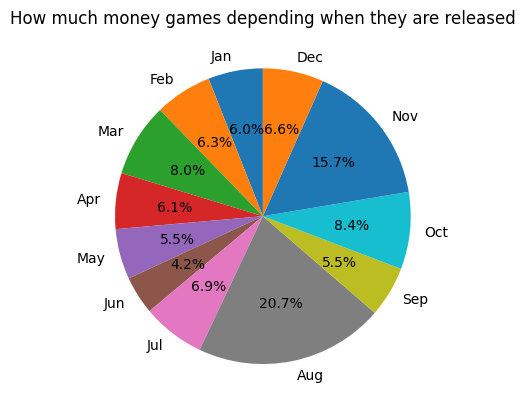

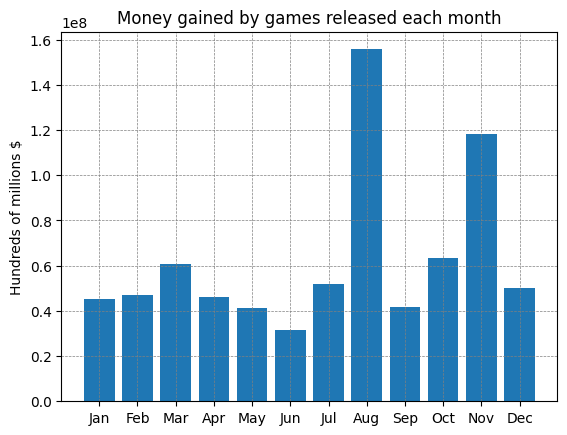

In [ ]:
#graph of % of games released each month
values= list(months[key]['gains']  for key in months)
keys= list(months.keys())

fig_1, ax1= plt.subplots()
ax1.pie(values, labels= keys, autopct='%1.1f%%', startangle=90)
ax1.set_title('How much money games depending when they are released')

fig2, ax2= plt.subplots()
ax2.bar(keys, values)
ax2.set_title('Money gained by games released each month')
ax2.set_ylabel('Hundreds of millions $')
ax2.grid(True, linestyle= "--", linewidth= 0.5, color="gray")

Fisrt of all, this is an aproximation as games once released can be bought anytime, although the first week tend to be the moment most sales are made.This graph shows how the 2 biggest selling periods are August and November, the main reason for this could be that August in the nothern hemisfere is summer and when people take their summer vacations. The spike on November can be atributed to the sales like black friday and the preparing of Christmas season and the presents.

In [ ]:
# Creation of a dictionary that has all the tags given by the comunity to describe games and their frequency
com_tag= {}
temp_df= clean_df[['tag_1','tag_2','tag_3']].copy()
for _,row in temp_df.iterrows():
  for tag in row:
    if tag not in com_tag:
      com_tag[tag] =1
    elif tag in com_tag:
      com_tag[tag] +=1
del com_tag[None]
#sorting the tags to get the most used ones first
tempo= sorted(com_tag.items(), key=lambda x:x [1], reverse= True )
tag_ord= dict(tempo)
print(tag_ord)
#elimination of the nan tag as it doesn't have any purpose

key_to_remove = None

for key, value in tag_ord.items():
    if isinstance(key, float) and math.isnan(key):
        key_to_remove = key
        break

if key_to_remove is not None:
    tag_ord.pop(key_to_remove)

print("Updated Dictionary:", tag_ord)

#choosing the first 10 tag
value= list(tag_ord.values())[:10]
head= list(tag_ord.keys())[:10]



{'Indie': 18917, 'Action': 13207, 'Casual': 9695, 'Adventure': 9246, nan: 8835, 'Strategy': 6625, 'Simulation': 6447, 'RPG': 5281, 'Early Access': 3831, 'Free to Play': 2241, 'Sports': 1082, 'Racing': 1066, 'Puzzle': 931, 'Violent': 844, 'VR': 836, 'Massively Multiplayer': 754, 'Nudity': 673, 'Design & Illustration': 658, 'Gore': 655, 'Sexual Content': 593, 'Anime': 562, 'Platformer': 518, 'Visual Novel': 486, 'Horror': 463, 'FPS': 461, 'Utilities': 427, 'Point & Click': 418, 'Hidden Object': 398, 'Multiplayer': 391, 'Web Publishing': 385, 'Open World': 307, 'Pixel Graphics': 262, 'Singleplayer': 244, 'Survival': 229, 'Female Protagonist': 214, "Shoot 'Em Up": 208, 'Space': 205, 'Classic': 191, 'Animation & Modeling': 189, 'RTS': 188, 'RPGMaker': 187, 'Turn-Based': 184, 'Great Soundtrack': 172, '2D': 168, 'Education': 168, 'Story Rich': 165, 'Arcade': 164, 'World War II': 163, 'Sci-fi': 156, 'Zombies': 152, 'Card Game': 150, 'Music': 142, 'Tower Defense': 137, 'Fantasy': 134, 'Video Pr

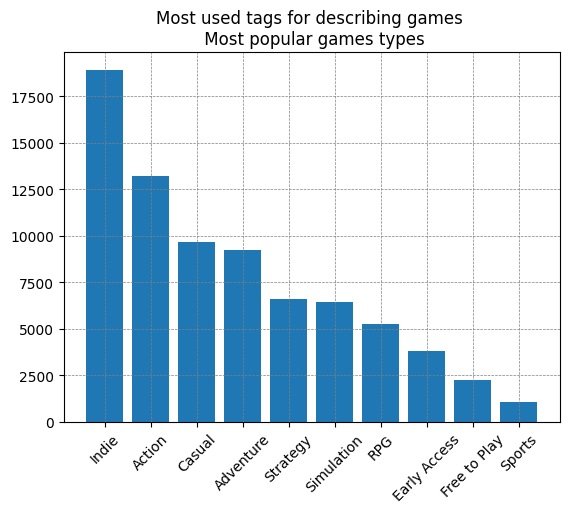

In [ ]:
plt.bar(head, value)
plt.title("Most used tags for describing games \n Most popular games types")
plt.xticks(rotation= 45)
plt.grid(True, linestyle= "--", linewidth= 0.5, color="gray")

In [ ]:
#check which was the most played tags
only_tags= list(tag_ord.keys())
temp_df= clean_df[['tag_1','tag_2','tag_3','total_votes','posit_reviews','aprox_money']].copy()

#creation of a dictionary with the tag, total of all the votes that tag had (as a way of identifying which is th most popular tag), average of positive reviews



tag_info= {}
for _, row in temp_df.iterrows():
    # Extract tag values
    tag_1 = row['tag_1']
    tag_2 = row['tag_2']
    tag_3 = row['tag_3']


    # Update dictionary with tag counts
    tag_info[tag_1] = tag_info.get(tag_1, {'count': 0, 'total_votes': 0, 'posit_reviews': 0, 'reviews_count': 0,'average_posit': 0, 'reviews_count':0,'gains':0})
    tag_info[tag_1]['count'] += 1
    tag_info[tag_1]['total_votes'] += row['total_votes']
    tag_info[tag_1]['gains'] += row['aprox_money']
    #This condition is because nan values can errase
    if math.isnan(row['posit_reviews']):
      a=1
    else:
      tag_info[tag_1]['posit_reviews'] += row['posit_reviews']
      tag_info[tag_1]['reviews_count'] += 1

    tag_info[tag_2] = tag_info.get(tag_2, {'count': 0, 'total_votes': 0, 'posit_reviews': 0,'reviews_count': 0,'average_posit': 0, 'reviews_count':0,'gains':0})
    tag_info[tag_2]['count'] += 1
    tag_info[tag_2]['total_votes'] += row['total_votes']
    tag_info[tag_2]['gains'] += row['aprox_money']

    if math.isnan(row['posit_reviews']):
      a=1
    else:
      tag_info[tag_2]['posit_reviews'] += row['posit_reviews']
      tag_info[tag_2]['reviews_count'] += 1

    tag_info[tag_3] = tag_info.get(tag_3, {'count': 0, 'total_votes': 0, 'posit_reviews': 0,'reviews_count': 0,'average_posit': 0, 'reviews_count':0,'gains':0})
    tag_info[tag_3]['count'] += 1
    tag_info[tag_3]['total_votes'] += row['total_votes']
    tag_info[tag_3]['gains'] += row['aprox_money']

    if math.isnan(row['posit_reviews']):
      a=1
    else:
      tag_info[tag_3]['posit_reviews'] += row['posit_reviews']
      tag_info[tag_3]['reviews_count'] += 1

# Now, tag_info contains counts and total_votes for each tag


# Using the total amount of positiv reviews and reviews count to create the average of positivity of each tag
for key in tag_info:
  if tag_info[key]['reviews_count'] > 0:
    tag_info[key]['average_posit']= int(round(tag_info[key]['posit_reviews']/ tag_info[key]['reviews_count']))
  tag_info[key]['average_gains']= int(round(tag_info[key]['gains']/tag_info[key]['count'],2))
print(tag_info)

{'FPS': {'count': 461, 'total_votes': 6374127, 'posit_reviews': 31788, 'reviews_count': 461, 'average_posit': 69, 'gains': 231708401.21999988, 'average_gains': 502621}, 'Gore': {'count': 655, 'total_votes': 313317, 'posit_reviews': 26030, 'reviews_count': 655, 'average_posit': 40, 'gains': 12109885.730000002, 'average_gains': 18488}, 'Action': {'count': 13207, 'total_votes': 4855175, 'posit_reviews': 438688, 'reviews_count': 13207, 'average_posit': 33, 'gains': 196105217.53000003, 'average_gains': 14848}, 'Survival': {'count': 229, 'total_votes': 3455138, 'posit_reviews': 14570, 'reviews_count': 229, 'average_posit': 64, 'gains': 58057501.48000003, 'average_gains': 253526}, 'Shooter': {'count': 89, 'total_votes': 4148288, 'posit_reviews': 5250, 'reviews_count': 89, 'average_posit': 59, 'gains': 120584892.30999999, 'average_gains': 1354886}, 'Multiplayer': {'count': 391, 'total_votes': 9681331, 'posit_reviews': 26556, 'reviews_count': 391, 'average_posit': 68, 'gains': 270189177.7300001

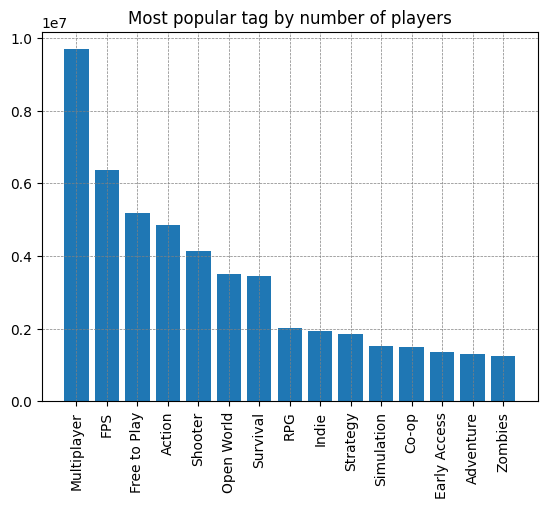

In [ ]:
#The sorting changes for diferent graphs, this one is sorting by number of reviews
sorted_tag_total = dict(sorted(tag_info.items(), key=lambda x: x[1]['total_votes'], reverse=True))

#creating a list with the 15 first values
temp_value = [tag_info[key]['total_votes'] for key in sorted_tag_total][:15]
temp_head= list(sorted_tag_total.keys())[:15]
plt.bar(temp_head, temp_value)
plt.title("Most popular tag by number of players")
plt.xticks(rotation= 90)
plt.grid(True, linestyle= "--", linewidth= 0.5, color="gray")


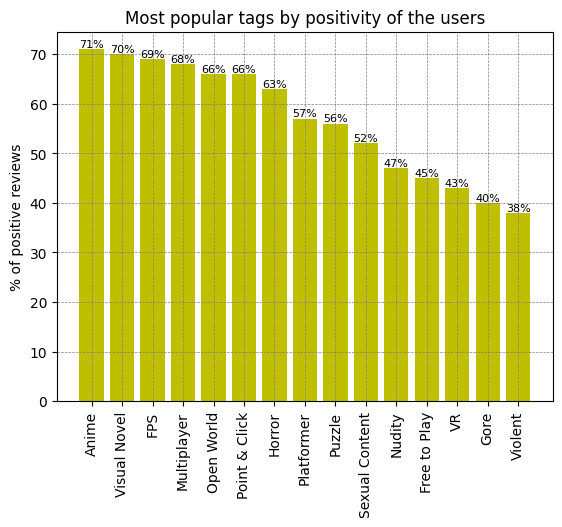

In [ ]:

filtered_tag_info = {k: v for k, v in tag_info.items() if v['reviews_count'] > 300}
sorted_tag_average = dict(sorted(filtered_tag_info.items(), key=lambda x: x[1]['average_posit'], reverse=True))

#creating a list with the 15 first values
temp_value = [tag_info[key]['average_posit'] for key in sorted_tag_average][:15]
temp_head= list(sorted_tag_average.keys())[:15]

#graph settings
plt.bar(temp_head, temp_value, color='y')
plt.title("Most popular tags by positivity of the users")
plt.xticks(rotation= 90)
plt.grid(True, linestyle= "--", linewidth= 0.5, color="gray")
plt.ylabel("% of positive reviews")
# Add labels to the bars
for i, value in zip(range(len(temp_head)), temp_value):
    plt.text(i, value, f'{value}%', ha='center', va='bottom', color='black', fontsize=8)



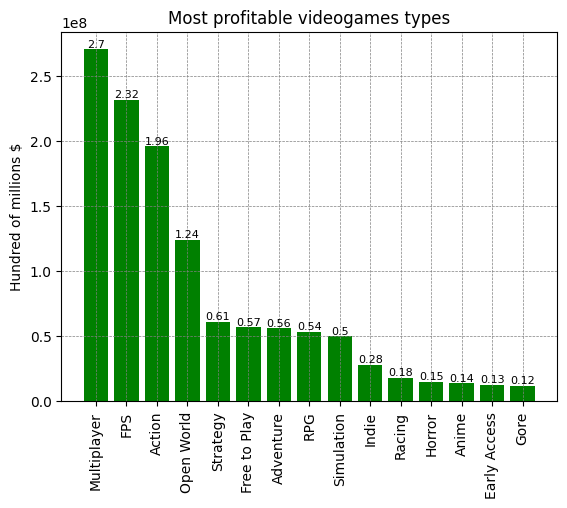

In [ ]:
sorted_tag_gains = dict(sorted(filtered_tag_info.items(), key=lambda x: x[1]['gains'], reverse=True))

#creating a list with the 15 first values
temp_value = [tag_info[key]['gains'] for key in sorted_tag_gains][:15]
temp_head= list(sorted_tag_gains.keys())[:15]
#since the value is too high to be placed in the graph
reduced_value=[]
for x in temp_value:
  divided= round(x/100000000, 2)
  reduced_value.append(divided)

#graph settings
plt.bar(temp_head, temp_value, color='g')
plt.title("Most profitable videogames types")
plt.xticks(rotation= 90)
plt.grid(True, linestyle= "--", linewidth= 0.5, color="gray")
plt.ylabel("Hundred of millions $")

for i, value in zip(range(len(temp_head)), reduced_value):
    plt.text(i, (value*100000000), f'{value}', ha='center', va='bottom', color='black', fontsize=8)

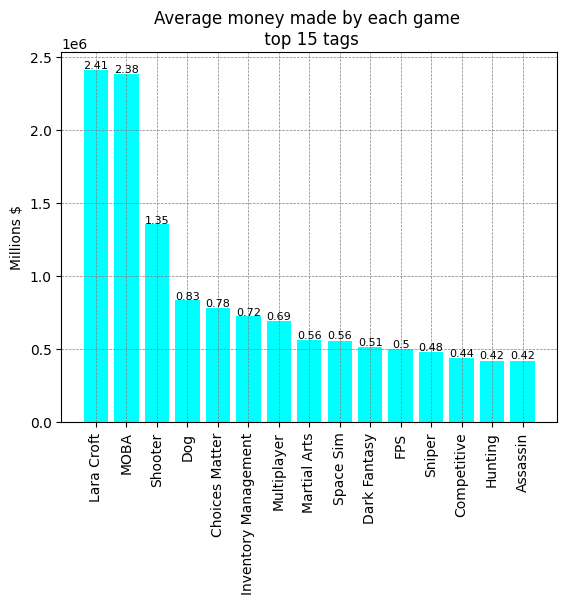

In [ ]:
sorted_tag_average = dict(sorted(tag_info.items(), key=lambda x: x[1]['average_gains'], reverse=True))

#creating a list with the 15 first values
temp_value = [tag_info[key]['average_gains'] for key in sorted_tag_average][:15]
temp_head= list(sorted_tag_average.keys())[:15]
#since the value is too high to be placed in the graph
reduced_value=[]
for x in temp_value:
  divided= round(x/1000000, 2)
  reduced_value.append(divided)

#graph settings
plt.bar(temp_head, temp_value, color='cyan')
plt.title("Average money made by each game \n top 15 tags")
plt.xticks(rotation= 90)
plt.grid(True, linestyle= "--", linewidth= 0.5, color="gray")
plt.ylabel("Millions $")

for i, value in zip(range(len(temp_head)), reduced_value):
    plt.text(i, (value*1000000), f'{value}', ha='center', va='bottom', color='black', fontsize=8)

This graph shows that even if a type of game/tag is popular not all games with it will be able to gain high quantities of money. In this graph is the first time that tags from know games (such as Lara Croff or Asassin) will have a bigger impact that just a common multiplayer game.


Conclusions:

Games out a franchise tend to gather money easier, if not, gathering 3 tags such as Dog, Choices matter and Inventory Managemente you could create a story driven game with animals or anthropomorphic animals. This way we would not enter in the space of shooters and multiplayer games as the market it's quite saturated of them already. Also, the game should try to come out for august or november so it could be bought in the summer vacations or christmas season as those moments have more people eager to spend money in games.